# State Vector Simulator for Quantum Computers

The state of a quantum bit, a qubit, can be represented as a vector, and as such, we can simulate them using linear algebra on classical computers. A qubit in state |0> is represented by the vector [1, 0]. This representation signifies that when the first qubit is measured, there is a probability of $1$ that the qubit will be measured in the state |0>. Likewise, a qubit in state |1> is represented by the vector [0, 1], and has a probability of $1$ of being measured in the state |1>.

A qubit can also be in the state [$\frac{1}{\sqrt{2}}$, $\frac{1}{\sqrt{2}}$], where it has an equal probability of being measured in the state |0> or |1>.

In [2]:
import numpy as np

In [3]:
zeroState = np.array([1, 0])
oneState = np.array([0, 1])


## Multi Qubit-Representations

Now that we have defined what our one qubit states look like, we now need to look at our multi-qubit states. We represent these states using the Kronecker product. This means a state with one qubit will have length 2, a state with two qubits will have length 4, and a state with n qubits will have length 2^n. The state will be represented as such:

|00> = [1, 0, 0, 0]

|01> = [0, 1, 0, 0]

|10> = [0, 0, 1, 0] 

|11> = [0, 0, 0, 1]



In [4]:
zeroZeroState = np.kron(zeroState, zeroState)
print("The state |00> is represented by this vector: ", zeroZeroState)
zeroOneState = np.kron(zeroState, oneState)
print("The state |01> is represented by this vector: ", zeroOneState)
oneZeroState = np.kron(oneState, zeroState)
print("The state |10> is represented by this vector: ", oneZeroState)
oneOneState = np.kron(oneState, oneState)
print("The state |11> is represented by this vector: ", oneOneState)

The state |00> is represented by this vector:  [1 0 0 0]
The state |01> is represented by this vector:  [0 1 0 0]
The state |10> is represented by this vector:  [0 0 1 0]
The state |11> is represented by this vector:  [0 0 0 1]


Now that we have confirmed that our multi-qubit representation is correct, we can now create our gates. Let us start by creating the identity gate.

In [5]:
I = np.array([[1, 0], [0, 1]])
print("After passing the qubit |0> through the I gate, we get: ", np.dot(I, zeroState))
print("After passing the qubit |1> through the I gate, we get: ", np.dot(I, oneState))

After passing the qubit |0> through the I gate, we get:  [1 0]
After passing the qubit |1> through the I gate, we get:  [0 1]


Next, we create the X, Y, and Z gates. These gates allow us to perform single qubit operations.

In [6]:
X = np.array([[0, 1], [1, 0]])
print("After passing the qubit |0> through the X gate, we get: ", np.dot(X, zeroState))
print("After passing the qubit |1> through the X gate, we get: ", np.dot(X, oneState))

Y = np.array([[0, -1j], [1j, 0]])
print("After passing the qubit |0> through the Y gate, we get: ", np.dot(Y, zeroState))
print("After passing the qubit |1> through the Y gate, we get: ", np.dot(Y, oneState))

Z = np.array([[1, 0], [0, -1]])
print("After passing the qubit |0> through the Z gate, we get: ", np.dot(Z, zeroState))
print("After passing the qubit |1> through the Z gate, we get: ", np.dot(Z, oneState))

After passing the qubit |0> through the X gate, we get:  [0 1]
After passing the qubit |1> through the X gate, we get:  [1 0]
After passing the qubit |0> through the Y gate, we get:  [0.+0.j 0.+1.j]
After passing the qubit |1> through the Y gate, we get:  [0.-1.j 0.+0.j]
After passing the qubit |0> through the Z gate, we get:  [1 0]
After passing the qubit |1> through the Z gate, we get:  [ 0 -1]


Finally, we add the CNOT and Hadamard(H) gates. These allow for entanglement and superposition, two of the properties that give quantum computing an advantage over classical computing when it comes to certain problems.

In [7]:
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
print("After passing the qubit |00> through the CNOT gate, we get: ", np.dot(CNOT, zeroZeroState))
print("After passing the qubit |01> through the CNOT gate, we get: ", np.dot(CNOT, zeroOneState))
print("After passing the qubit |10> through the CNOT gate, we get: ", np.dot(CNOT, oneZeroState))
print("After passing the qubit |11> through the CNOT gate, we get: ", np.dot(CNOT, oneOneState))

InverseCNOT = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])
print("After passing the qubit |00> through the Inverse CNOT gate, we get: ", np.dot(InverseCNOT, zeroZeroState))
print("After passing the qubit |01> through the Inverse CNOT gate, we get: ", np.dot(InverseCNOT, zeroOneState))
print("After passing the qubit |10> through the Inverse CNOT gate, we get: ", np.dot(InverseCNOT, oneZeroState))
print("After passing the qubit |11> through the Inverse CNOT gate, we get: ", np.dot(InverseCNOT, oneOneState))

H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
print("After passing the qubit |0> through the H gate, we get: ", np.dot(H, zeroState))
print("After passing the qubit |1> through the H gate, we get: ", np.dot(H, oneState))

After passing the qubit |00> through the CNOT gate, we get:  [1 0 0 0]
After passing the qubit |01> through the CNOT gate, we get:  [0 1 0 0]
After passing the qubit |10> through the CNOT gate, we get:  [0 0 0 1]
After passing the qubit |11> through the CNOT gate, we get:  [0 0 1 0]
After passing the qubit |00> through the Inverse CNOT gate, we get:  [1 0 0 0]
After passing the qubit |01> through the Inverse CNOT gate, we get:  [0 0 0 1]
After passing the qubit |10> through the Inverse CNOT gate, we get:  [0 0 1 0]
After passing the qubit |11> through the Inverse CNOT gate, we get:  [0 1 0 0]
After passing the qubit |0> through the H gate, we get:  [0.70710678 0.70710678]
After passing the qubit |1> through the H gate, we get:  [ 0.70710678 -0.70710678]


We can now start building circuits. In order to do that, we set up our initial quantum state by using the kroneker product and our initial states. We will start by building a small circuit with just three qubits.

In [8]:
inputs = [0,0,0]
if inputs[0] == 0:
    initial_state = zeroState
else:
    initial_state = oneState

for i in range(len(initial_state - 1)):
    if inputs[i] == 0:
        initial_state = np.kron(initial_state, zeroState)
    else:
        initial_state = np.kron(initial_state, oneState)

print("The initial state is: ", initial_state)

The initial state is:  [1 0 0 0 0 0 0 0]


Now, we will create a sample circuit. We take the first qubit and use the H gate to put it in a superposition. Then we use a CNOT to entangle the first and second qubit. Then we use CNOTs to swap the values of the second and third qubit.

In [9]:
first_layer_gates = [H, I, I]
for i in range(len(first_layer_gates)):
    if i == 0:
        first_layer = first_layer_gates[i]
    else:
        first_layer = np.kron(first_layer, first_layer_gates[i])

second_layer_gates = [CNOT, I]
for i in range(len(second_layer_gates)):
    if i == 0:
        second_layer = second_layer_gates[i]
    else:
        second_layer = np.kron(second_layer, second_layer_gates[i])

third_layer_gates = [I, CNOT]
for i in range(len(third_layer_gates)):
    if i == 0:
        third_layer = third_layer_gates[i]
    else:
        third_layer = np.kron(third_layer, third_layer_gates[i])

fourth_layer_gates = [I, InverseCNOT]
for i in range(len(fourth_layer_gates)):
    if i == 0:
        fourth_layer = fourth_layer_gates[i]
    else:
        fourth_layer = np.kron(fourth_layer, fourth_layer_gates[i])

fifth_layer_gates = [I, CNOT]
for i in range(len(fifth_layer_gates)):
    if i == 0:
        fifth_layer = fifth_layer_gates[i]
    else:
        fifth_layer = np.kron(fifth_layer, fifth_layer_gates[i])


In [10]:
first_state = np.dot(first_layer, initial_state)
print("The state after the first layer is: ", first_state)

second_state = np.dot(second_layer, first_state)
print("The state after the second layer is: ", second_state)

third_state = np.dot(third_layer, second_state)
print("The state after the third layer is: ", third_state)

fourth_state = np.dot(fourth_layer, third_state)
print("The state after the fourth layer is: ", fourth_state)

fifth_state = np.dot(fifth_layer, fourth_state)
print("The state after the fifth layer is: ", fifth_state)

The state after the first layer is:  [0.70710678 0.         0.         0.         0.70710678 0.
 0.         0.        ]
The state after the second layer is:  [0.70710678 0.         0.         0.         0.         0.
 0.70710678 0.        ]
The state after the third layer is:  [0.70710678 0.         0.         0.         0.         0.
 0.         0.70710678]
The state after the fourth layer is:  [0.70710678 0.         0.         0.         0.         0.70710678
 0.         0.        ]
The state after the fifth layer is:  [0.70710678 0.         0.         0.         0.         0.70710678
 0.         0.        ]


Let us make some functions to simplify the process of creating a circuit.

In [16]:
def create_initial_state(input):
    if input[0] == 0:
        initial_state = zeroState
    else:
        initial_state = oneState

    for i in range(1, len(input)):
        if input[i] == 0:
            initial_state = np.kron(initial_state, zeroState)
        else:
            initial_state = np.kron(initial_state, oneState)

    return initial_state

def create_layers(gates):
    layers = []
    for i in range(len(gates)):
        for j in range(len(gates[i])):
            if j == 0:
                cur_layer = gates[i][j]
            else:
                cur_layer = np.kron(cur_layer, gates[i][j])
        layers.append(cur_layer)
    return layers

def apply_layers(layers, initial_state):
    cur_state = initial_state
    for i in range(len(layers)):
        cur_state = np.dot(layers[i], cur_state)
    return cur_state

Now, we check that our functions do the same thing as the code above.

In [19]:
initial_state = create_initial_state([0, 0, 0])
print("The initial state is: ", initial_state)

gates = [[H, I, I], [CNOT, I], [I, CNOT], [I, InverseCNOT], [I, CNOT]]
layers = create_layers(gates)

final_state = apply_layers(layers, initial_state)
print("The final state is: ", final_state)

if np.array_equal(fifth_state, final_state):
    print("The final state is correct")

The initial state is:  [1 0 0 0 0 0 0 0]
The final state is:  [0.70710678 0.         0.         0.         0.         0.70710678
 0.         0.        ]
The final state is correct


## Testing Runtime

There are two main factors that can affect the runtime of the circuit: The amount of qubits, and the depth of the circuit. We will now explore how these two variables affect the runtime. First, we randomly generate the initial qubit state, as well as a random circuit. The gates we chose do not matter, as everything is done through matrix multiplication.

In [20]:
def create_random_state(num_qubits):
    choices = [0, 1]
    initial_state = np.random.choice(choices, num_qubits)
    return initial_state

def create_random_layers(num_layers, num_qubits):
    gates = [H, I, X, Y, Z, CNOT, InverseCNOT]
    layers = []
    for i in range(num_layers):
        cur_layer = []
        j = 0
        while (j < num_qubits):
            gate = np.random.choice(range(7))
            cur_layer.append(gates[gate])
            j += 1
            if gate == 5 or gate == 6:
                j += 1
                if j > num_qubits:
                    cur_layer.pop()
                    j -= 2
        layers.append(cur_layer)
    return layers

In [21]:
state = create_random_state(3)
print("The random state is: ", state)

circuit = create_random_layers(5, 3)
for layer in circuit:
    print("The layer is: ", layer)

state = create_initial_state(state)
circuit = create_layers(circuit)

print(np.size(state))
final_state = apply_layers(circuit, state)
print("The final state is: ", final_state)

The random state is:  [0 1 1]
The layer is:  [array([[ 1,  0],
       [ 0, -1]]), array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])]
The layer is:  [array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]]), array([[ 1,  0],
       [ 0, -1]])]
The layer is:  [array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]]), array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])]
The layer is:  [array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
The layer is:  [array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]]), array([[1, 0],
       [0, 1]])]
8
The final state is:  [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]


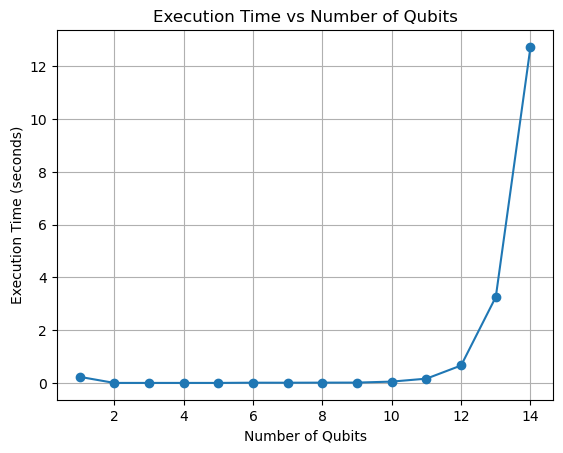

In [27]:
import time
import matplotlib.pyplot as plt

depth = 5
qubit_values = range(1, 15)
execution_times = []

for num_qubits in qubit_values:
    start_time = time.time()

    state = create_random_state(num_qubits)
    state = create_initial_state(state)

    circuit = create_random_layers(depth, num_qubits)
    circuit = create_layers(circuit)

    apply_layers(circuit, state)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Plot the results
plt.plot(qubit_values, execution_times, marker='o')
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Qubits')
plt.grid(True)
plt.show()

When running our circuit, the time taken to simulate qubits grows exponentially, meaning we can only simulate circuit with less than ~20 qubits in reasonable time.

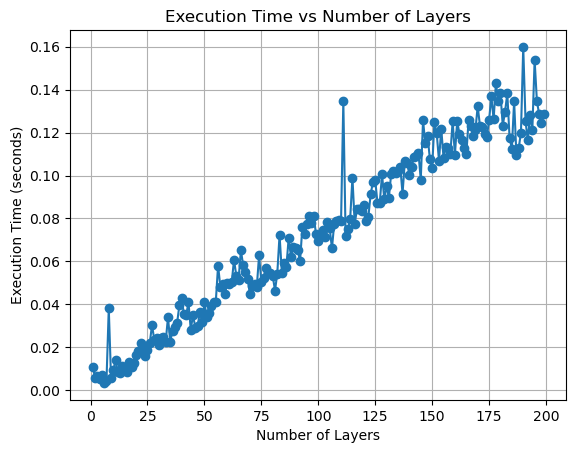

In [32]:
depth_values = range(1, 200)
num_qubits = 8
execution_times = []

for num_layers in depth_values:
    start_time = time.time()

    state = create_random_state(num_qubits)
    state = create_initial_state(state)

    circuit = create_random_layers(num_layers, num_qubits)
    circuit = create_layers(circuit)

    apply_layers(circuit, state)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Plot the results
plt.plot(depth_values, execution_times, marker='o')
plt.xlabel('Number of Layers')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Layers')
plt.grid(True)
plt.show()

However, the time taken to simulate additional layers grows linearly, meaning we can simulate circuits with arbitrary depth in reasonable timeframes. This time can also be shortened by compliation strategies that take certain sets of gates and simplify them.

## Circuit Simulation Using Tensor Multiplication

Now, we change our approach towards simulating circuits. Instead of representing our qubit states using a vector, we use an n-dimensional tensor, combined with tensor multiplication to apply gates to the circuit. First, lets look at what our initial state looks like.

In [34]:
initial_state = create_initial_state([0, 0, 0])
print("The initial vector state is: ", initial_state)

initial_state_tensor = np.reshape(initial_state, (2,) * 3)
print("The initial tensor state is: ", initial_state_tensor)

The initial vector state is:  [1 0 0 0 0 0 0 0]
The initial tensor state is:  [[[1 0]
  [0 0]]

 [[0 0]
  [0 0]]]


Now, we need to redefine certain gates, specifically the CNOT and the InverseCNOT gates, into tensor form.

In [36]:
T_CNOT = np.reshape(CNOT, (2, 2, 2, 2))
print("The CNOT tensor is: ", T_CNOT)

T_InverseCNOT = np.reshape(InverseCNOT, (2, 2, 2, 2))
print("The Inverse CNOT tensor is: ", T_InverseCNOT)

The CNOT tensor is:  [[[[1 0]
   [0 0]]

  [[0 1]
   [0 0]]]


 [[[0 0]
   [0 1]]

  [[0 0]
   [1 0]]]]
The Inverse CNOT tensor is:  [[[[1 0]
   [0 0]]

  [[0 0]
   [0 1]]]


 [[[0 0]
   [1 0]]

  [[0 1]
   [0 0]]]]


Now, we can try applying the gates to the initial state.

In [74]:
qubit = 0
axes = ([0], [qubit])
state_tensor = np.tensordot(X, initial_state_tensor, axes)
state_tensor = np.moveaxis(state_tensor, 0, qubit)
print("The state tensor after applying the X gate is: ", state_tensor)
temp_tensor = state_tensor
print("The state vector after applying the X gate is: ", np.reshape(temp_tensor, 8))


The state tensor after applying the X gate is:  [[[0 0]
  [0 0]]

 [[1 0]
  [0 0]]]
The state vector after applying the X gate is:  [0 0 0 0 1 0 0 0]


In [76]:
qubits = [0, 1]
axes = ([0, 1], qubits)
state_tensor = np.tensordot(T_CNOT, state_tensor, axes)
state_tensor = np.moveaxis(state_tensor, [0, 1], qubits)
print("The state tensor after applying the CNOT gate is: ", state_tensor)
temp_tensor = state_tensor
print("The state vector after applying the CNOT gate is: ", np.reshape(temp_tensor, 8))

The state tensor after applying the CNOT gate is:  [[[0 0]
  [0 0]]

 [[0 0]
  [1 0]]]
The state vector after applying the CNOT gate is:  [0 0 0 0 0 0 1 0]


Now that we can successfully apply our tensor gates to our tensor state, we need to rewrite some of our functions to account for these new changes.

In [83]:
def create_initial_tensor_state(input):
    if input[0] == 0:
        initial_state = zeroState
    else:
        initial_state = oneState

    for i in range(1, len(input)):
        if input[i] == 0:
            initial_state = np.kron(initial_state, zeroState)
        else:
            initial_state = np.kron(initial_state, oneState)

    return np.reshape(initial_state, (2,) * len(input))

def apply_tensor_layers(layers, initial_state):
    cur_state = initial_state
    for i in range(len(layers)):
        gates = layers[i]
        qubit = 0
        for gate in gates:
            if gate.shape == (2, 2):
                axes = ([0], [qubit])
            else:
                axes = ([0, 1], [qubit, qubit + 1])
                qubit += 1
            cur_state = np.tensordot(gate, cur_state, axes)
            cur_state = np.moveaxis(cur_state, axes[0], axes[1])
    return cur_state

In [84]:
create_initial_tensor_state([0, 0, 0])
layers = [[X, I, I], [T_CNOT, I]]
final_state = apply_tensor_layers(layers, create_initial_tensor_state([0, 0, 0]))
print("The final tensor state is: ", final_state)

The final tensor state is:  [[[0 0]
  [0 0]]

 [[0 0]
  [1 0]]]


## Testing Runtime of Tensor Simulation

Now that we have created our quantum computer simuator with tensors, we can redo the testing using our new simulator.

In [85]:
def create_random_tensor_layers(num_layers, num_qubits):
    gates = [H, I, X, Y, Z, T_CNOT, T_InverseCNOT]
    layers = []
    for i in range(num_layers):
        cur_layer = []
        j = 0
        while (j < num_qubits):
            gate = np.random.choice(range(7))
            cur_layer.append(gates[gate])
            j += 1
            if gate == 5 or gate == 6:
                j += 1
                if j > num_qubits:
                    cur_layer.pop()
                    j -= 2
        layers.append(cur_layer)
    return layers

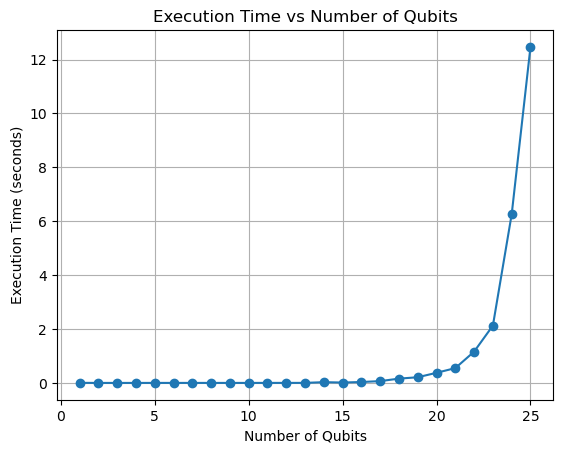

In [95]:
depth = 5
qubit_values = range(1, 26)
execution_times = []

for num_qubits in qubit_values:
    start_time = time.time()

    state = create_random_state(num_qubits)
    state = create_initial_tensor_state(state)


    circuit = create_random_tensor_layers(depth, num_qubits)

    apply_tensor_layers(circuit, state)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Plot the results
plt.plot(qubit_values, execution_times, marker='o')
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Qubits')
plt.grid(True)
plt.show()

## Results

Our simulator using state vector simulation took around 13 seconds to create and run a circuit that had 14 qubits. On the other hand, our tensor simulator took around 14 seconds to create and run a circuit that had 25 qubits, which is quite a large jump in computational power.

## Getting Output
In order to sample the results, we collapse the tensor to a state vector, or use the final state vector. Then, we find the expectation values by squaring all of the values in the state vector.

In [223]:
import random

def calculate_expectation_values(state):
    if state.ndim != 1:
        state = np.flatten(state)
    return np.square(state)

def sample_from_states(expectation_values):
    possible_states = []
    for i in range(len(expectation_values)):
        if expectation_values[i] > 0:
            length = len(expectation_values)
            qubits = np.log2(length)
            string = "|"
            for j in range(int(qubits)):
                if i % (length / (2**(j))) < length / (2**(j+1)):
                    string += "0"
                else:
                    string += "1"
            string += ">"
            possible_states.append([string, expectation_values[i]])
        expectation_values[i] += expectation_values[i - 1]

    outputs = [item[0] for item in possible_states]
    probabilities = [item[1] for item in possible_states]
    return random.choices(outputs, probabilities)[0]

In [238]:
expectation = calculate_expectation_values(np.array([0, 0, np.sqrt(2), 0, 0, np.sqrt(2), 0, 0]))
sample_from_states(expectation)

'|010>'

Now, we can pass in our final state, in either tensor or state vector form, and recieve an array representing the expectation values, and sample from these expectation values.